##### Configurações Iniciais

In [35]:
import os
import seaborn as sns
from itertools import product

from Modules.get_recomendation import RecomendadorOperacional, RecomendadorVisual
from Modules.variables_info import variables_info

In [36]:
legendas_dict = {
    var: leg.replace(')', ')\n') if ')' in leg else leg
    for var, leg in zip(variables_info['variaveis'], variables_info['legendas'])
}

# Repositorios de Saída
base_output = '../Output/Analise_04'
os.makedirs('../Output/Analise_04', exist_ok=True)
for subfolder in ['Relatorios', 'Relatorios/Modelo_01', 'Relatorios/Modelo_02']:
    os.makedirs(os.path.join(base_output, subfolder), exist_ok=True)

##### Modelo

###### Parametros de Entrada

In [37]:
modelo_in = 'Modelo_02'

In [38]:
model_path = f'../Output/Analise_03/Modelos/{modelo_in}'
forecast_path = '../Database/forecast_data/'
forecast_file = 'forcing_atm_WRF_prg1_2024103006.nc'
cenarios = ['conservador', 'moderado', 'arrojado']
modelos = ['LogisticRegression', 'RandomForest']

Relatório salvo em: ../Output/Analise_04/Relatorios/Modelo_02\relatorio_forcing_atm_WRF_prg1_2024103006_conservador_LogisticRegression.png
Relatório salvo em: ../Output/Analise_04/Relatorios/Modelo_02\relatorio_forcing_atm_WRF_prg1_2024103006_conservador_RandomForest.png
Relatório salvo em: ../Output/Analise_04/Relatorios/Modelo_02\relatorio_forcing_atm_WRF_prg1_2024103006_moderado_LogisticRegression.png
Relatório salvo em: ../Output/Analise_04/Relatorios/Modelo_02\relatorio_forcing_atm_WRF_prg1_2024103006_moderado_RandomForest.png
Relatório salvo em: ../Output/Analise_04/Relatorios/Modelo_02\relatorio_forcing_atm_WRF_prg1_2024103006_arrojado_LogisticRegression.png
Relatório salvo em: ../Output/Analise_04/Relatorios/Modelo_02\relatorio_forcing_atm_WRF_prg1_2024103006_arrojado_RandomForest.png


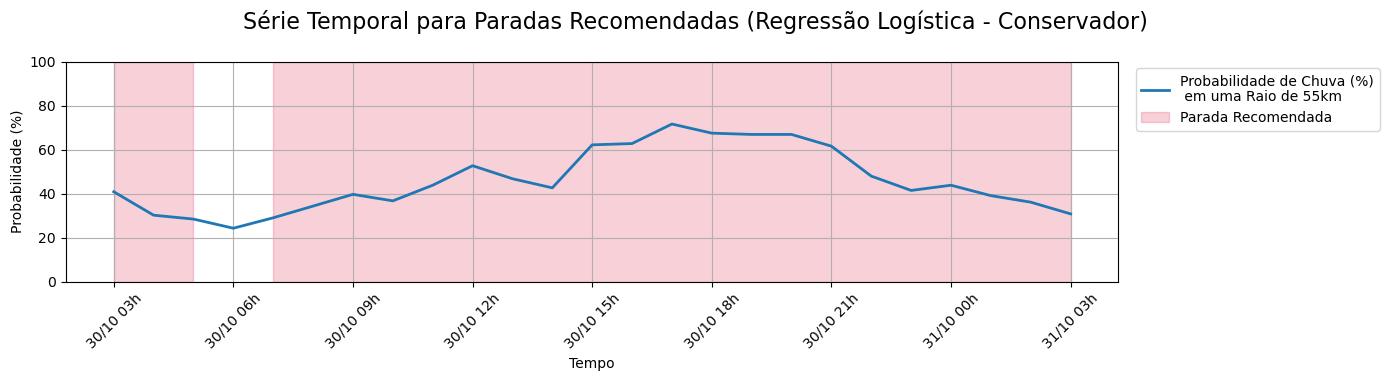

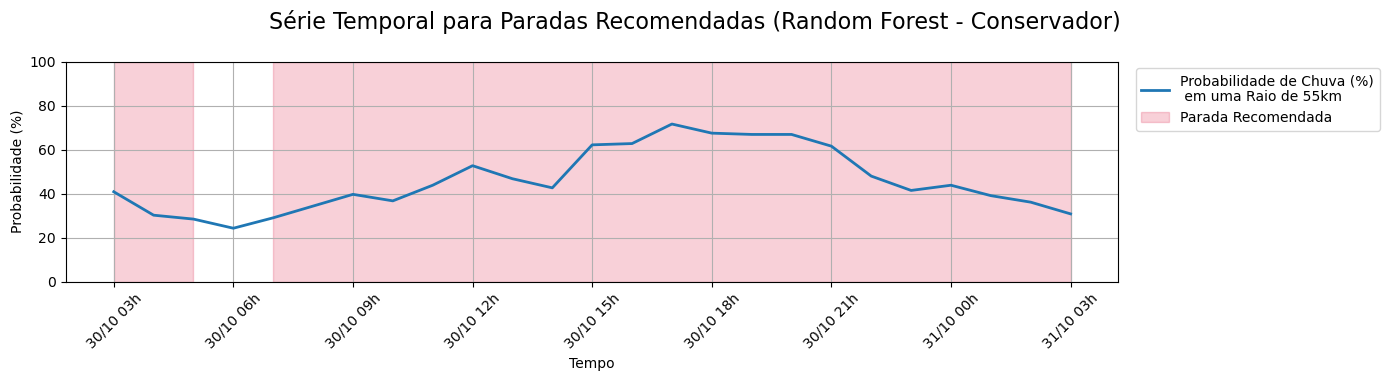

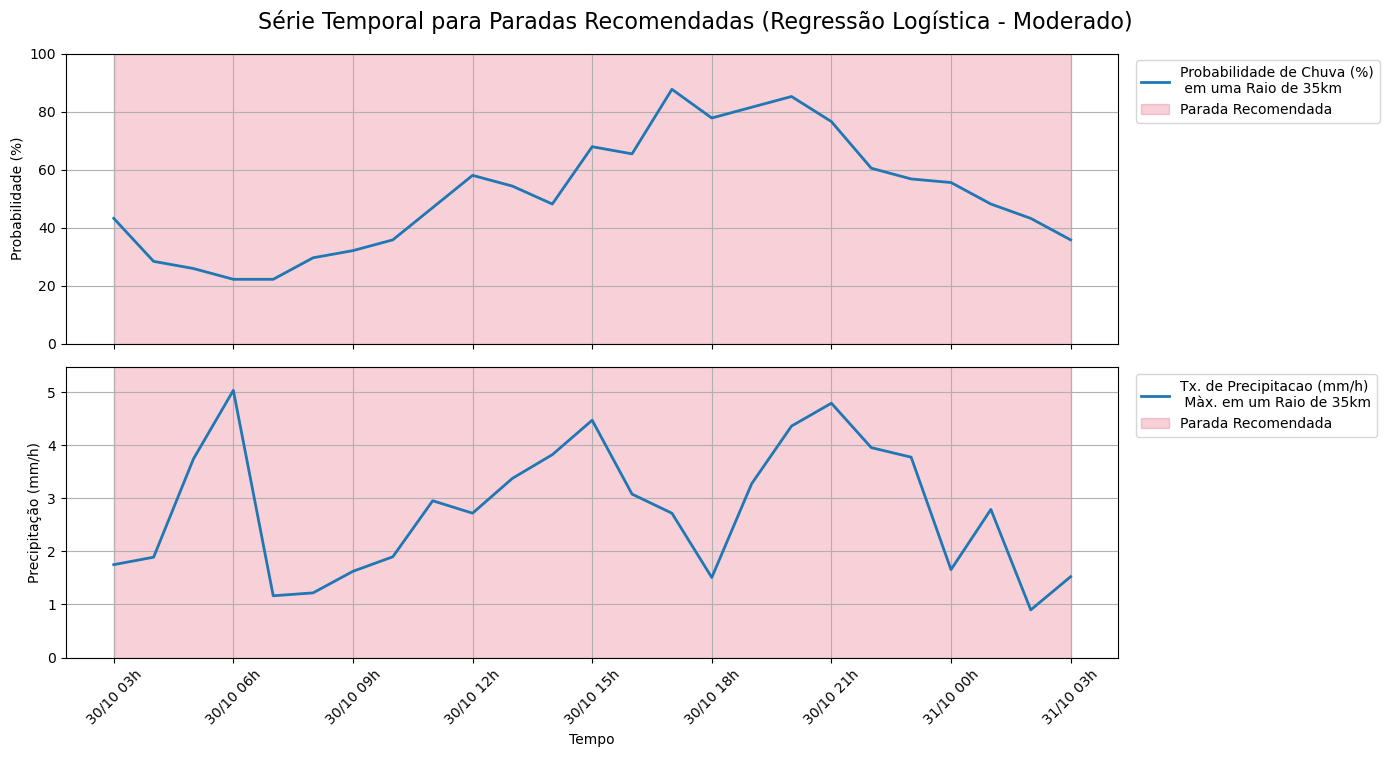

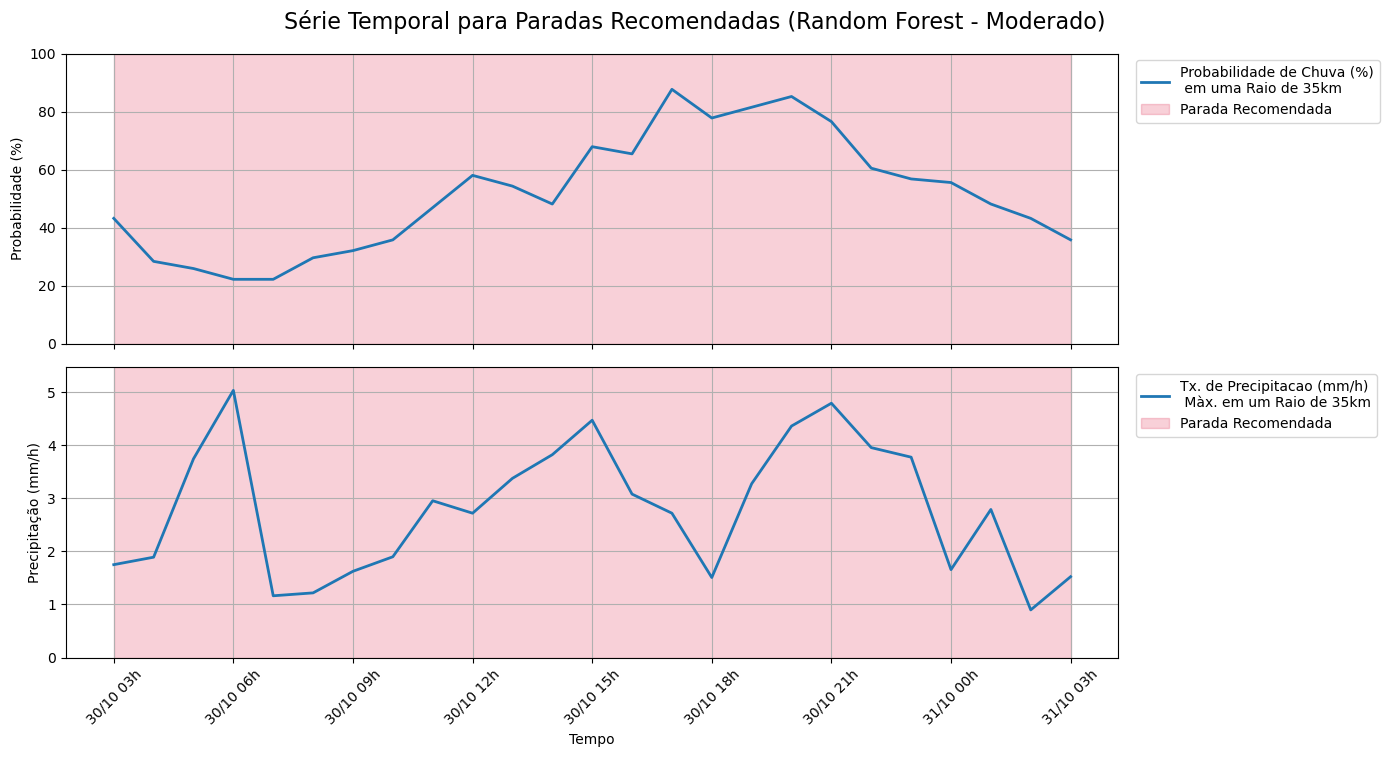

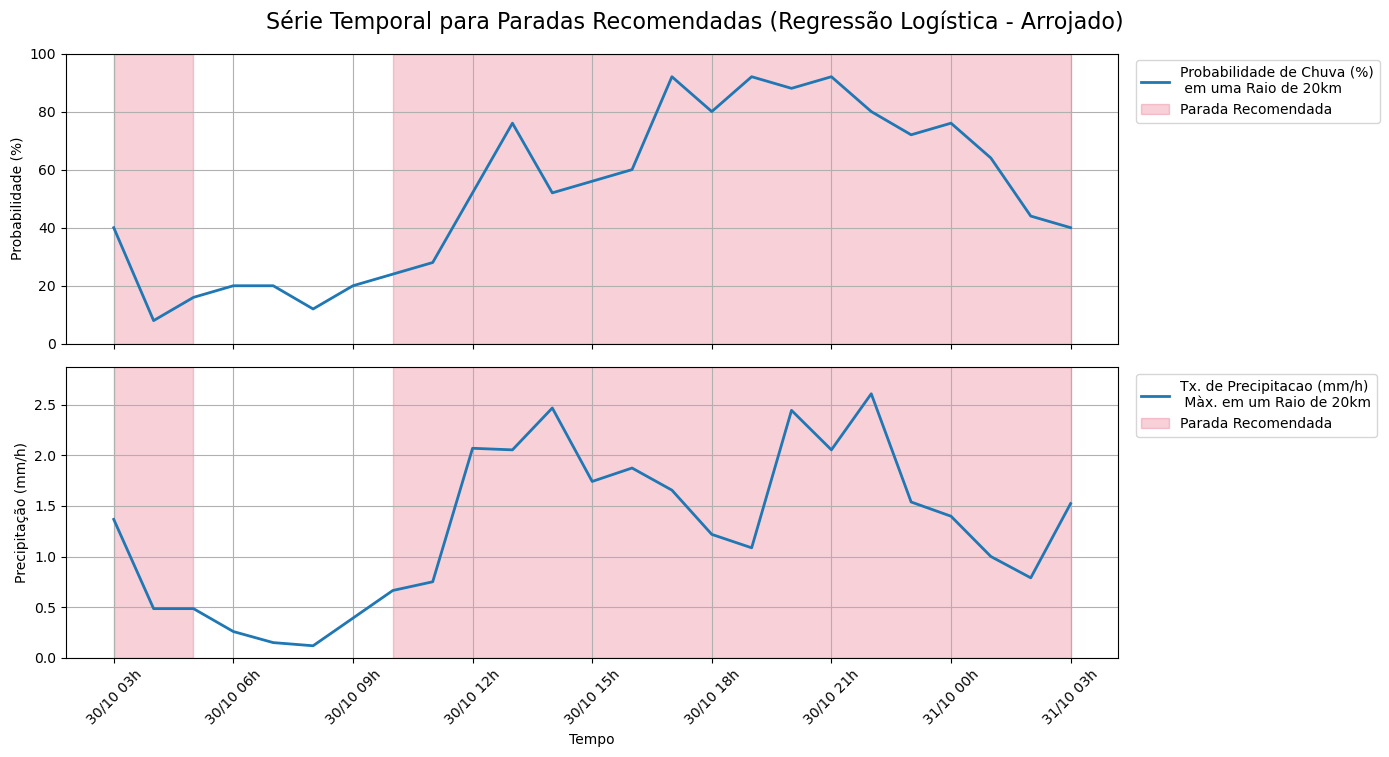

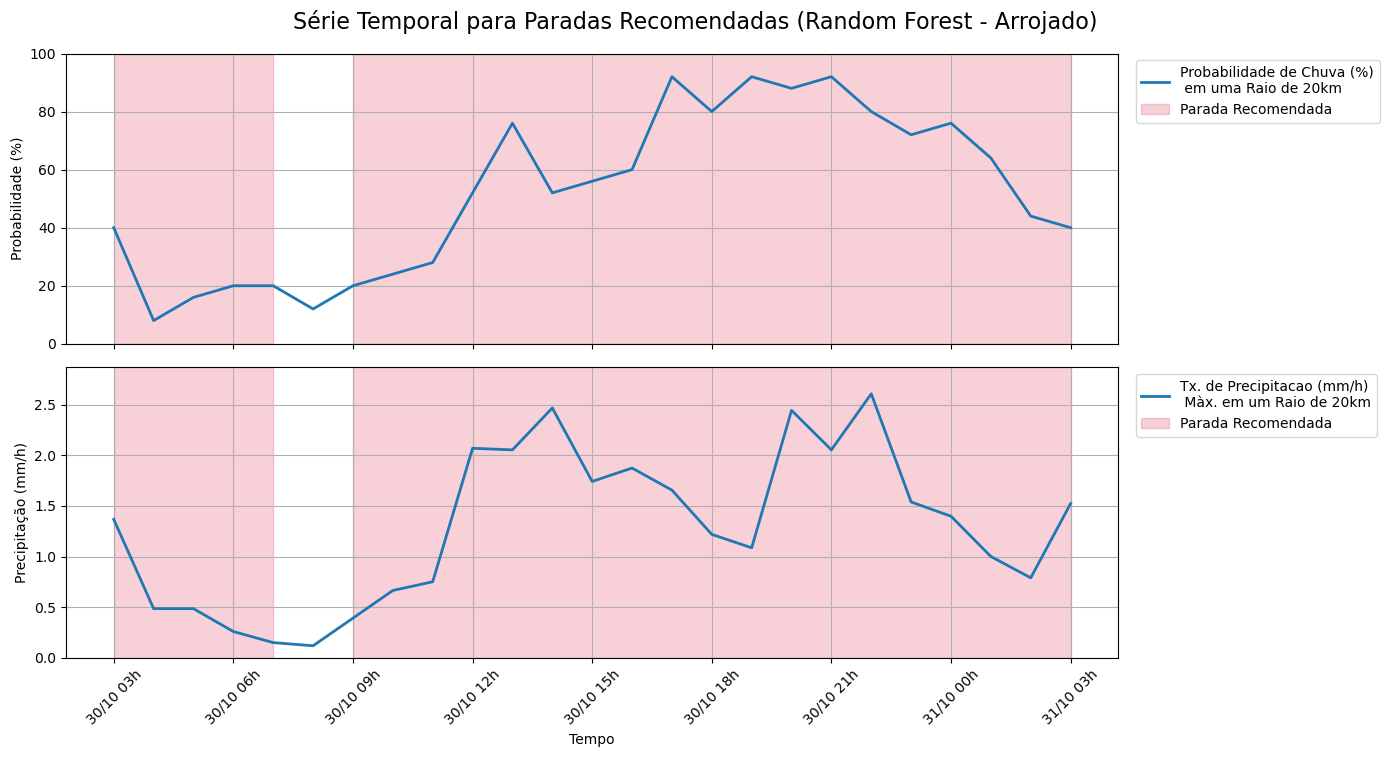

In [39]:
for cenario, modelo in product(cenarios, modelos):
    rec = RecomendadorOperacional(base_model_path=model_path)
    resultado = rec.prever(
        path_nc=forecast_path + forecast_file,
        cenario=cenario, modelo=modelo,
        lat=-25.500511, lon=-48.519331
    )

    visual = RecomendadorVisual()
    visual.gerar_relatorio(
        resultado,
        modelo=modelo, cenario=cenario,
        nome_arquivo=f'relatorio_{forecast_file[:31]}_{cenario}_{modelo}',
        salvar_em=f'{base_output}/Relatorios/{modelo_in}'
    )